In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

from matplotlib import ticker
from math import cos, sin, atan

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = plt.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        plt.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = plt.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        plt.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            plt.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            plt.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            plt.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

            
class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        plt.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        plt.axis('scaled')
        plt.axis('off')
        plt.title( 'Neural Network architecture', fontsize=15 )
        plt.show()

        
class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

In [3]:
nn = DrawNN([2, 3, 1])


# 1.1  
Draw a network with 2 inputs, 1 hidden layer with 3 units, and 1 output unit.  Assume ReLU hidden layer activation.

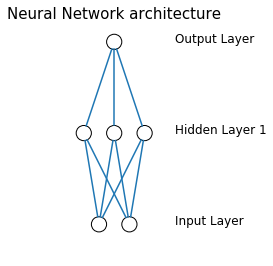

In [4]:
nn.draw()

# 1.2
Write out the mathematical equation for the output of this network.

$$ \hat{y} = \sigma(v \cdot Relu(w \cdot x + b) + c) $$

# 1.3
Write out the forward-pass function in python, call it ff_nn_ReLu(...)

In [5]:
# Creating ReLu function
relu = np.vectorize(lambda x: np.fmax(0,x))

In [6]:
def sigmoid(x):
    '''
    Compute the softmax of each element along an axis of X.
    In a neural network, x would be the input to the unit, and the returned value is the output of the unit.

    Input:
    x: A single float value.
    
    Return:
    The sigmoid transformation of x.
    '''
    neg_e = np.exp(-x)
    return 1/(1+neg_e)

In [7]:
def ff_nn_relu(X, w1, w2, b1, b2):
    '''
    For weight matrix, it is assumed that the columns are the units in layer L-1,
    and rows are the units in layer L.
    
    Input:
    x: ND-Array of input records.  Each row represents a feature.  Each column is a new training record.  
    w1: ND-Array of weights.  
    w2: ND-Array of weights.
    b1: single value for the bias in hidden layer.  
    b2: single value for the bias in output layer.
    '''
    z1 = w1.dot(X) + b1
    a1 = relu(z1)
    z2 = w2.dot(a1) + b2
    a2 = sigmoid(z2)
    out = np.round(a2, 2)
    return out

# 1.4

Suppose you have the following set of weight matrices:

W = [[1, -1, 0], [0, 0, .5]]  
b = [[0], [0], [1]]  
V = [[1], [0], [-1]]  
c = [1]  
X = [[1, -1], [0, -1], [0, 1]]  


What are the class probabilities associated with the forward pass of each sample?

In [8]:
W = np.array([[1, -1, 0], [0, 0, .5]]).T
b = np.array([[0], [0], [1]])
V = np.array([[1], [0], [-1]]).T
c = np.array([1])
X = np.array([[1, -1], [0, -1], [0, 1]]).T

In [9]:
ff_nn_relu(X, W, V, b, c)

array([[0.82, 0.62, 0.38]])

The class probabilities associated with the forward pass for each sample:
  
Input (1, -1) = .82  
Input (0, -1) = .62  
Input (0, 1) = .38

# 2  
Consider a simple non-convex function of two variables: 
$$ f(x,y) = (1 - x^{3}) + 100*(y^2 - x)^2 $$

# 2.1 
What are the partial derivatives of f with respect to x and to y?


$$\frac{\partial{f}}{\partial{y}} = 200*(y^2 - x)(2y)$$
$$\frac{\partial{f}}{\partial{x}} = -3x^2 + 200*(y^2 -x)(-1) $$

# 2.2
Create a visualization of the contours of this function

In [10]:
def f(x, y):
    return (1-x**3) + 100*(y**2-x)**2

In [11]:
def draw_empty():
    delta = 0.05
    x = np.arange(-1.0, 1.0, delta)
    y = np.arange(-1.0, 1.0, delta)
    X, Y = np.meshgrid(x, y)

    plt.figure()
    plt.contourf(X, Y, f(X, Y), 5, alpha=1, cmap=plt.cm.hot)
    C = plt.contour(X, Y, f(X, Y), 8, locator=ticker.LogLocator(), colors='black', linewidth=0.01)
    plt.clabel(C, inline=True, fontsize=10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

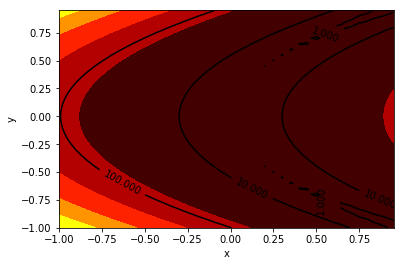

In [12]:
draw_empty()

# 2.3
Write a Gradient Descent algorithm for finding the minimum of the function.  Visualize your results with a few different learning rates. 

In [13]:
def grab_gradient(x, y):
    '''
    Returns the gradient of f(x, y) at point x and y.  
    
    (df/dx, df/dy)
    '''
    return np.array([[-3*x**2 + 200*(y**2 -x)*(-1)], [200*(y**2 - x)*(2*y)]])

In [14]:
def grad_descent(x0, y0, its, alpha):
    '''
    x0 and y0 are initial starting points 
    '''
    curr = np.array([[x0], [y0]])
    x = []
    y = []
    x.append(x0)
    y.append(y0)
    for it in range(its):
        gradient = grab_gradient(curr[0][0], curr[1][0])
        if (gradient[1][0] == 0) and (gradient[0][0] == 0):
            return x, y
        curr = curr + (-1)*alpha*gradient
        x.append(curr[0][0])
        y.append(curr[1][0])
    return x, y

In [15]:
def draw_graph(iterations, learning_rate):
    delta = 0.05
    x = np.arange(-5.0, 5.0, delta)
    y = np.arange(-5.0, 5.0, delta)
    X, Y = np.meshgrid(x, y)

    plt.figure()
    plt.contourf(X, Y, f(X, Y), 5, alpha=0, cmap=plt.cm.hot)
    C = plt.contour(X, Y, f(X, Y), 8, locator=ticker.LogLocator(), colors='black', linewidth=0.01)
    plt.clabel(C, inline=True, fontsize=10)
    
    x_in = -2
    y_in = 2
    plt.plot(x_in, y_in, marker='o')
    xv, yv = grad_descent(x_in, y_in, iterations, learning_rate)
    plt.plot(xv, yv, label='track')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gradient for function with learning rate {lr}'.format(lr = learning_rate))
    plt.legend()
    plt.show()

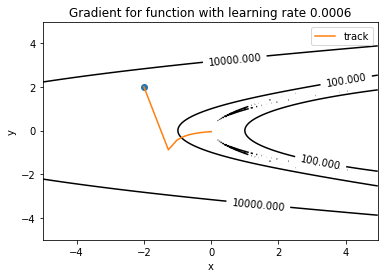

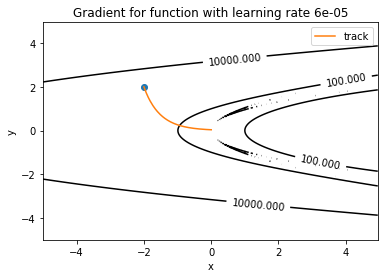

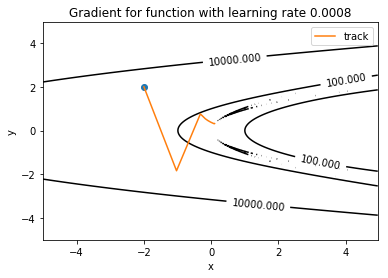

In [16]:
draw_graph(1000, .0006)
draw_graph(1000, .00006)
draw_graph(1000, .0008)

# 2.4 
Write a Gradient Descent With Momentum algorithm for finding the minimum.  Visualize your results with a few different settings of the algorithm's hyperparameters. 

In [17]:
def grad_descent_momentum(x0, y0, its, alpha, beta):
    '''
    x0 and y0 are initial starting points
    alpha is the learning rate 
    beta is the parameter weight for the contribution of previous gradients.  
    '''
    curr = np.array([[x0], [y0]])
    x = []
    y = []
    grads = []
    x.append(x0)
    y.append(y0)
    for it in range(its):
        gradient = grab_gradient(curr[0][0], curr[1][0])
        grads.append(gradient)
        if len(grads) == 1:
            grad = -1*alpha*gradient
        else:
            grad = beta*grads[-2] + (-1)*alpha*gradient
        curr = curr + grad
        x.append(curr[0][0])
        y.append(curr[1][0])
    return x, y

In [18]:
def draw_graph(iterations, learning_rate, beta):
    delta = 0.05
    x = np.arange(-5.0, 5.0, delta)
    y = np.arange(-5.0, 5.0, delta)
    X, Y = np.meshgrid(x, y)

    plt.figure()
    plt.contourf(X, Y, f(X, Y), 5, alpha=0, cmap=plt.cm.hot)
    C = plt.contour(X, Y, f(X, Y), 8, locator=ticker.LogLocator(), colors='black', linewidth=0.01)
    plt.clabel(C, inline=True, fontsize=10)
    
    x_in = -1
    y_in = 2
    plt.plot(x_in, y_in, marker='o')
    xv, yv = grad_descent_momentum(x_in, y_in, iterations, learning_rate, beta)
    plt.plot(xv, yv, label='track')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gradient for function with learning rate {lr}'.format(lr = learning_rate))
    plt.legend()
    plt.show()

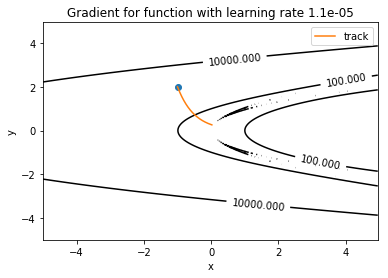

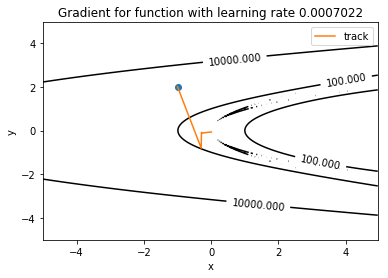

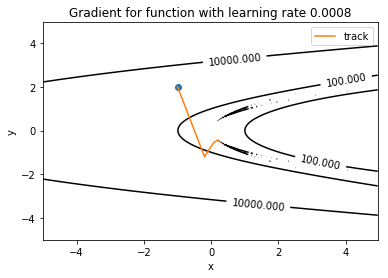

In [19]:
draw_graph(1000, .000011, .000000015)
draw_graph(1000, .0007022, .000127)
draw_graph(1000, .0008, .00000005)

# 3.1
For the same network as in Question 1, derive expressions of the gradient of the loss function with respect to each of the model parameters.  

$$
   w=
  \left[ {\begin{array}{cc}
   w_{11} & w_{12} \\
   w_{21} & w_{22} \\
   w_{31} & w_{32} \\
  \end{array} } \right]
$$  
$$
   z^1=
  \left[ {\begin{array}{cc}
   z_{1}^1 \\
   z_{2}^1 \\
   z_{3}^1 \\
  \end{array} } \right]
$$  
$$
   a^1=
  \left[ {\begin{array}{cc}
   a_{1}^1 \\
   a_{2}^1 \\
   a_{3}^1 \\
  \end{array} } \right]
$$  
$$
   z^2=
  \left[ {\begin{array}{c}
   z_{1}^2 \\
  \end{array} } \right]
$$  
$$
   v=
  \left[ {\begin{array}{ccc}
   v_{11} & v_{12} & v_{13} \\
  \end{array} } \right]
$$  
$$
   a^2=
  \left[ {\begin{array}{c}
   a_{1}^2 \\
  \end{array} } \right]
$$  

$$z_1^1 = w_{11}^1 \cdot x_1 + w_{12}^1 \cdot x_2$$  
$$z_2^1 = w_{21}^1 \cdot x_1 + w_{22}^1 \cdot x_2$$  
$$z_3^1 = w_{31}^1 \cdot x_1 + w_{32}^1 \cdot x_2$$  
$$a^1 = Relu(z_1^1)$$  
$$a^2 = Relu(z_2^1)$$  
$$a^3 = Relu(z_3^1)$$  
$$z_1^2 = v_{11} \cdot z_1^1 + v_{12} \cdot z_2^1 + v_{13} \cdot z_3^1$$  
$$a^2 = \sigma{(z_1^2)}$$  
$$ \frac{\partial{a^1_1}}{\partial{z^1}} = 
\begin{cases} 
      0 & 0 > z_1 \\
      1 & otherwise \\ 
   \end{cases}
$$  
$$ \frac{\partial{a^2_1}}{\partial{z^2_1}} = \frac{-e^{-z_1^2}}{(1+e^{-z_1^2})}$$  
$$c=-y \cdot log(\hat{y}) - (1-y) \cdot log(1-\hat{y})$$  
$$ \frac{\partial{c}}{\partial{\hat{y}}} = \frac{-y}{\hat{y}} - \frac{(1-y)}{(1-\hat{y})}$$  
$$\delta_1^2 = \frac{\partial{c}}{\partial{z_1^2}}$$  
$$\delta_1^2 = \left(\frac{-y}{a_1^2} - \frac{(1-y)}{(1-a_1^2)}\right) \cdot \frac{-e^{-z_1^2}}{(1+e^{-z_1^2})}$$  
$$\delta_1^2 = \frac{\partial{c}}{\partial{b_1^2}}$$  
$$\frac{\partial{c}}{\partial{v_{11}}} = a_1^1 \cdot \delta_1^2 = Relu(z_1^1) \cdot \left(\frac{-y}{a_1^2} - \frac{(1-y)}{1-a_1^2)} \right) \cdot \left(\frac{-e^{-z_1^2}}{(1+e^{-z_1^2})} \right)$$  
$$\frac{\partial{c}}{\partial{v_{12}}} = a_2^1 \cdot \delta_1^2 = Relu(z_2^1) \cdot \left(\frac{-y}{a_1^2} - \frac{(1-y)}{1-a_1^2)} \right) \cdot \left(\frac{-e^{-z_1^2}}{(1+e^{-z_1^2})} \right)$$  
$$\frac{\partial{c}}{\partial{v_{13}}} = a_3^1 \cdot \delta_1^2 = Relu(z_3^1) \cdot \left(\frac{-y}{a_1^2} - \frac{(1-y)}{1-a_1^2)} \right) \cdot \left(\frac{-e^{-z_1^2}}{(1+e^{-z_1^2})} \right)$$  
$$ \delta_1^1 = v_{11} \cdot \left(\frac{-y}{a_1^2} - \frac{(1-y)}{1-a_1^2}\right) \cdot \frac{-e^{-z_1^2}}{(1+e^{-z_1^2})} \cdot \frac{\partial{a^1}}{\partial{z^1}}$$  
$$ \delta_2^1 = v_{12} \cdot \left(\frac{-y}{a_1^2} - \frac{(1-y)}{1-a_1^2}\right) \cdot \frac{-e^{-z_1^2}}{(1+e^{-z_1^2})}  \cdot \frac{\partial{a^1}}{\partial{z^1}}$$  
$$ \delta_3^1 = v_{13} \cdot \left(\frac{-y}{a_1^2} - \frac{(1-y)}{1-a_1^2}\right) \cdot \frac{-e^{-z_1^2}}{(1+e^{-z_1^2})}  \cdot \frac{\partial{a^1}}{\partial{z^1}}$$  
$$\frac{\partial{c}}{\partial{w_{11}}} = a_1^0 \cdot \delta_1^1 = x_1 \cdot v_{11} \cdot \left(\frac{-y}{a_1^2} - \frac{(1-y)}{1-a_1^2}\right) \cdot \frac{-e^{-z_1^2}}{(1+e^{-z_1^2})} \cdot \frac{\partial{a^1}}{\partial{z^1}}$$  
$$\frac{\partial{c}}{\partial{w_{12}}} = a_2^0 \cdot \delta_1^1 = x_2 \cdot v_{12} \cdot \left(\frac{-y}{a_1^2} - \frac{(1-y)}{1-a_1^2}\right) \cdot \frac{-e^{-z_1^2}}{(1+e^{-z_1^2})} \cdot \frac{\partial{a^1}}{\partial{z^1}}$$  
$$\frac{\partial{c}}{\partial{w_{21}}} = a_1^0 \cdot \delta_2^1 = x_1 \cdot v_{12} \cdot \left(\frac{-y}{a_1^2} - \frac{(1-y)}{1-a_1^2}\right) \cdot \frac{-e^{-z_1^2}}{(1+e^{-z_1^2})} \cdot \frac{\partial{a^1}}{\partial{z^1}}$$  
$$\frac{\partial{c}}{\partial{w_{22}}} = a_2^0 \cdot \delta_2^1 = x_2 \cdot v_{12} \cdot \left(\frac{-y}{a_1^2} - \frac{(1-y)}{1-a_1^2}\right) \cdot \frac{-e^{-z_1^2}}{(1+e^{-z_1^2})} \cdot \frac{\partial{a^1}}{\partial{z^1}}$$  
$$\frac{\partial{c}}{\partial{w_{31}}} = a_1^0 \cdot \delta_3^1 = x_1 \cdot v_{13} \cdot \left(\frac{-y}{a_1^2} - \frac{(1-y)}{1-a_1^2}\right) \cdot \frac{-e^{-z_1^2}}{(1+e^{-z_1^2})} \cdot \frac{\partial{a^1}}{\partial{z^1}}$$  
$$\frac{\partial{c}}{\partial{w_{32}}} = a_2^0 \cdot \delta_3^1 = x_2 \cdot v_{13} \cdot \left(\frac{-y}{a_1^2} - \frac{(1-y)}{1-a_1^2}\right) \cdot \frac{-e^{-z_1^2}}{(1+e^{-z_1^2})} \cdot \frac{\partial{a^1}}{\partial{z^1}}$$  
$$\frac{\partial{c}}{\partial{b_1^1}} = \delta_1^1$$

# 3.2
Write a function grad_f(...) that takes in a weight vector and returns the radient of the loss at that location.  

In [20]:
# Creating ReLu function
relu = np.vectorize(lambda x: np.fmax(0,x))

def sigmoid(x):
    '''
    Compute the softmax of each element along an axis of X.
    In a neural network, x would be the input to the unit, and the returned value is the output of the unit.

    Input:
    x: A single float value.
    
    Return:
    The sigmoid transformation of x.
    '''
    neg_e = np.exp(-x)
    return 1/(1+neg_e)

def ff_nn_relu(X, w1, w2, b1, b2):
    '''
    Feed-forward pass.  
    For weight matrix, it is assumed that the columns are the units in layer L-1,
    and rows are the units in layer L.
    
    Input:
    x: ND-Array of input records.  Each row represents a feature.  Each column is a new training record.  
    w1: ND-Array of weights.  
    w2: ND-Array of weights.
    b1: single value for the bias in hidden layer.  
    b2: single value for the bias in output layer.
    '''
    z1 = w1.dot(X) + b1
    a1 = relu(z1)
    z2 = w2.dot(a1) + b2
    a2 = sigmoid(z2)
    out = np.round(a2, 2)
    return out, z1, a1, z2, a2

def loss(y, y_hat):
    '''
    Assumes nd-array inputs.
    Returns the sum of the losses for each training observation.  
    '''
    y_hat = y_hat + 1/100
    loss = -y * np.log(y_hat) - (1-y) * np.log(1-y_hat)
    return loss.sum()

def loss_deriv(y, y_hat):
    '''
    Assume nd-array inputs.
    '''
    y_hat = y_hat + 1/100
    return (y/(y_hat) - (1-y)/(1-y_hat))

In [21]:
def grad_f(w1, w2, b1, b2, x, y):

    y_hat, z1, a1, z2, a2 = ff_nn_relu(x, w1, w2, b1, b2)
    error_layer_2 = loss_deriv(y, y_hat)*(-np.exp(-z2)/(1+np.exp(-z2))) # 
    error_layer_1 = w2.T.dot(error_layer_2) * (z1>0) # 3 by n matrix, where n is number of obs.  
    
    
    dc_dw2 = a1.dot(error_layer_2.T) # this is a 3 by n matrix, where n is number of obs.
    dc_dw1 = x.dot(error_layer_1.T) # this is a 2 by 3 matrix, where each element is sum
                                    # of the derivative of each observation.
    
    # calculating the mean of the derivative. average gradient
    d_b2 = error_layer_2.mean(axis=1)
    d_b1 = error_layer_1.mean(axis=1)[..., np.newaxis]
    dc_dw2 = dc_dw2.mean(axis=1)
    dc_dw1 = (dc_dw1/x.shape[0]).T
    
    return dc_dw1, dc_dw2, d_b1, d_b2

# 3.3

Generate a synthetic dataset like XOR pattern.

In [22]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
x = x.T

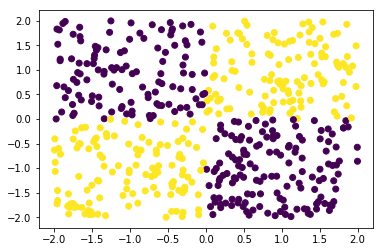

In [23]:
plt.scatter(x[0],x[1],c=y)

# 3.4 
Fit your network using Gradient Descent.  Keep track of the total loss at each iteration and plot the result.

In [24]:
def grad_descent(x, y, its, alpha):
    '''
    x is training data and y is response variable.
    '''
    # Initializing parameters.
    w1 = np.random.uniform(-1, 1, size=(3,2)).astype("float")
    w2 = np.random.uniform(-1, 1, size=(1,3)).astype('float')
    b1 = np.random.uniform(-1, 1, size=(3,1)).astype('float')
    b2 = np.random.uniform(-1, 1, size=1).astype('float')
    traj_w1 = []
    traj_w2 = []
    traj_b1 = []
    traj_b2 = []
    traj_w1.append(w1)
    traj_w2.append(w2)
    traj_b1.append(b1)
    traj_b2.append(b2)
    y_hat, z1, a1, z2, a2 = ff_nn_relu(x, w1, w2, b1, b2)
    losses = [loss(y, y_hat)]
    
    for it in range(its):
        dc_dw1, dc_dw2, d_b1, d_b2 = grad_f(w1, w2, b1, b2, x, y)
        w1 = w1 + (-1)*alpha*dc_dw1
        w2 = w2 + (-1)*alpha*dc_dw2
        b1 = b1 + (-1)*alpha*d_b1
        b2 = b2 + (-1)*alpha*d_b2
        traj_w1.append(w1)
        traj_w2.append(w2)
        traj_b1.append(b1)
        traj_b2.append(b2)
        y_hat, z1, a1, z2, a2 = ff_nn_relu(x, w1, w2, b1, b2)
        losses.append(loss(y, y_hat))
    return traj_w1, traj_w2, traj_b1, traj_b2, losses

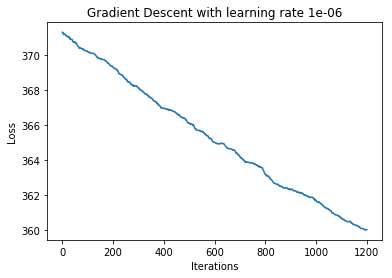

In [25]:
learning_rate = 0.000001
traj_w1, traj_w2, traj_b1, traj_b2, losses = grad_descent(x, y, 1200, learning_rate)
plt.plot(losses)
plt.title("Gradient Descent with learning rate {lr}".format(lr=learning_rate))
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

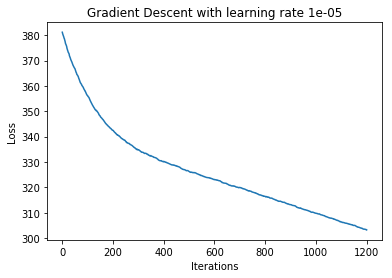

In [26]:
learning_rate = 0.00001
traj_w1, traj_w2, traj_b1, traj_b2, losses = grad_descent(x, y, 1200, learning_rate)
plt.plot(losses)
plt.title("Gradient Descent with learning rate {lr}".format(lr=learning_rate))
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

# 3.5
Repeat the exercise above using Momenum.  Comment on whether your algorithm seems to converge more efficiently.  

In [27]:
def grad_descent_momentum(x, y, its, alpha, beta):
    '''
    x is training data and y is response variable.
    '''
    # Initializing parameters.
    w1 = np.random.uniform(-1, 1, size=(3,2)).astype("float")
    w2 = np.random.uniform(-1, 1, size=(1,3)).astype('float')
    b1 = np.random.uniform(-1, 1, size=(3,1)).astype('float')
    b2 = np.random.uniform(-1, 1, size=1).astype('float')
    traj_w1 = []
    traj_w2 = []
    traj_b1 = []
    traj_b2 = []
    traj_w1.append(w1)
    traj_w2.append(w2)
    traj_b1.append(b1)
    traj_b2.append(b2)
    dw1_der = []
    dw2_der = []
    b1_der = []
    b2_der = []
    y_hat, z1, a1, z2, a2 = ff_nn_relu(x, w1, w2, b1, b2)
    losses = [loss(y, y_hat)]
    
    for it in range(its):
        dc_dw1, dc_dw2, d_b1, d_b2 = grad_f(w1, w2, b1, b2, x, y)
        # keeping a history of the gradient  
        dw1_der.append(dc_dw1)
        dw2_der.append(dc_dw2)
        b1_der.append(d_b1)
        b2_der.append(d_b2)
        if len(dw1_der) == 1:
            w1 = w1 + (-1)*alpha*dc_dw1
            w2 = w2 + (-1)*alpha*dc_dw2
            b1 = b1 + (-1)*alpha*d_b1
            b2 = b2 + (-1)*alpha*d_b2
        else:
            grad_1 = beta*dw1_der[-2] + (-1)*alpha*dc_dw1
            grad_2 = beta*dw2_der[-2] + (-1)*alpha*dc_dw2
            grad_3 = beta*b1_der[-2] + (-1)*alpha*d_b1
            grad_4 = beta*b2_der[-2] + (-1)*alpha*d_b2
            w1 = w1 + grad_1
            w2 = w2 + grad_2
            b1 = b1 + grad_3
            b2 = b2 + grad_4
        traj_w1.append(w1)
        traj_w2.append(w2)
        traj_b1.append(b1)
        traj_b2.append(b2)
        y_hat, z1, a1, z2, a2 = ff_nn_relu(x, w1, w2, b1, b2)
        losses.append(loss(y, y_hat))
    return traj_w1, traj_w2, traj_b1, traj_b2, losses


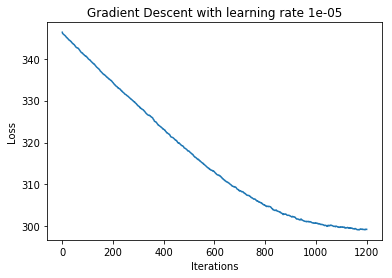

In [32]:
learning_rate = 0.00001
traj_w1, traj_w2, traj_b1, traj_b2, losses = grad_descent_momentum(x, y, 1200, learning_rate, beta=.000001)
plt.plot(losses)
plt.title("Gradient Descent with learning rate {lr}".format(lr=learning_rate))
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


Gradient descent With momentum will converge quicker than without momentum.  

# 3.6
Plot a visualization of the final descion boundary that your model has learned.  Overlay the datapoints in this plot.  

In [33]:
# Set min and max values and give it some padding
x_min, x_max = x[0, :].min() - .5, x[0, :].max() + .5
y_min, y_max = x[1, :].min() - .5, x[1, :].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
temp = np.c_[xx.ravel(), yy.ravel()]
Z, z1, a1, z2, a2 = ff_nn_relu(temp.T, traj_w1[-1], traj_w2[-1], traj_b1[-1], traj_b2[-1])
Z = Z.reshape(xx.shape)

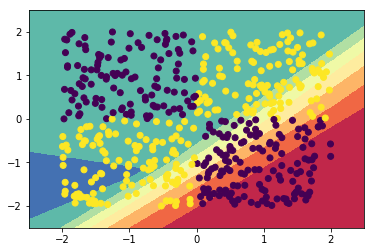

In [34]:
# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(x[0],x[1],c=y)